<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [2]:
%matplotlib inline
# To reload external scripts automatically
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Importing external files
from scripts.similarities import *
from scripts.amazon_api_interaction import *
from scripts.analysis import *
from scripts.data_import import *
from scripts.utils_project import *


pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DATA_FOLDER = "../../Project-Data/"
META_FOLDER = DATA_FOLDER + "meta/"
REVIEWS_FOLDER = DATA_FOLDER + "reviews/"
CORE_FOLDER = DATA_FOLDER + "5_core/"
DUMP_FOLDER = DATA_FOLDER + "dump/"
CATEGORIES = ['Books','Movies_and_Tv','Electronics']
MAXCOUNT = -1
ANALYSIS_DATA_FOLDER = 'analysis_data/'

In [4]:
meta_reviews_df = pd.read_pickle('../../Project-Data/dump/reviews_Books_asin_overall_unixReviewTime_ALL')
meta_books_df = pd.read_pickle('../../Project-Data/dump/meta_Books_asin_title_salesRank_description_imUrl_ALL')
meta_books_df = meta_books_df[['asin', 'description', 'imUrl', 'salesRank_Books', 'title']].set_index('asin')

In [5]:
meta_reviews_df.head()

,asin,overall,unixReviewTime
0,0000000116,4.0,2002-04-27
1,0000000116,1.0,2014-03-24
2,0000000868,4.0,2002-09-11
3,0000013714,4.0,2013-10-31
4,0000013714,5.0,2013-07-27


In [6]:
meta_books_df.reset_index().head()

,asin,description,imUrl,salesRank_Books,title
0,0001048791,NaN,http://ecx.images-amazon.com/images/I/51MKP0T4...,6334800.0,"The Crucible: Performed by Stuart Pankin, Jero..."
1,0001048775,William Shakespeare is widely regarded as the ...,http://ecx.images-amazon.com/images/I/5166EBHD...,13243226.0,Measure for Measure: Complete & Unabridged
2,0001048236,"""One thing is certain, Sherlockians, put aside...",http://ecx.images-amazon.com/images/I/51DH145C...,8973864.0,The Sherlock Holmes Audio Collection
3,0000401048,NaN,http://ecx.images-amazon.com/images/I/41bchvIf...,6448843.0,The rogue of publishers' row;: Confessions of ...
4,0001019880,NaN,http://ecx.images-amazon.com/images/I/61LcHUdv...,9589258.0,Classic Soul Winner's New Testament Bible


In [15]:
review_average = meta_reviews_df.groupby('asin').mean().reset_index()
review_count = meta_reviews_df.groupby('asin').count().reset_index()
df = pd.merge(meta_books_df.reset_index(), review_average, on='asin')

In [17]:
review_count.head()

,asin,overall,unixReviewTime
0,0000000116,2,2
1,0000000868,1,1
2,0000013714,14,14
3,0000015393,1,1
4,0000029831,5,5


In [8]:
df.head()

,asin,description,imUrl,salesRank_Books,title,overall
0,0001048791,NaN,http://ecx.images-amazon.com/images/I/51MKP0T4...,6334800.0,"The Crucible: Performed by Stuart Pankin, Jero...",5.0
1,0001048775,William Shakespeare is widely regarded as the ...,http://ecx.images-amazon.com/images/I/5166EBHD...,13243226.0,Measure for Measure: Complete & Unabridged,2.0
2,0001048236,"""One thing is certain, Sherlockians, put aside...",http://ecx.images-amazon.com/images/I/51DH145C...,8973864.0,The Sherlock Holmes Audio Collection,5.0
3,0000401048,NaN,http://ecx.images-amazon.com/images/I/41bchvIf...,6448843.0,The rogue of publishers' row;: Confessions of ...,5.0
4,0001019880,NaN,http://ecx.images-amazon.com/images/I/61LcHUdv...,9589258.0,Classic Soul Winner's New Testament Bible,5.0


In [9]:
df.shape

(2330066, 6)

In [10]:
meta_books_df.shape

(2370585, 4)

In [11]:
pearson_corr = df.corr()
spearman_corr = df.corr(method='spearman')

In [12]:
pearson_corr

,salesRank_Books,overall
salesRank_Books,1.000000,-0.039825
overall,-0.039825,1.000000


In [13]:
spearman_corr

,salesRank_Books,overall
salesRank_Books,1.000000,0.097156
overall,0.097156,1.000000


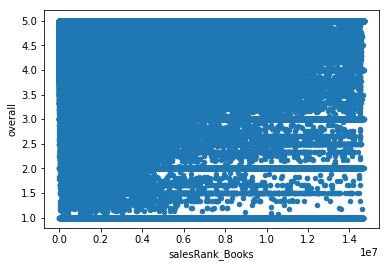

In [14]:
df.plot(kind='scatter', x='salesRank_Books', y='overall')